Reference

GridSearchCV coding in Assignment 4 reference

https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search

https://www.ritchieng.com/machine-learning-cross-validation/

https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4

https://www.kaggle.com/parthshah98/k-fold-cross-validation-for-knn/notebook
https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

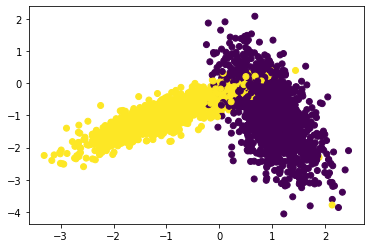

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [0]:
## divide numbers ranging from 0 to len(X_train) into 3 folds

def divide_training_dataset_to_k_folds(x_train,y_train,folds):
    length_training_data = len(x_train)/folds
    x_train = x_train.tolist()
    y_train = y_train.tolist()
    group = []
    label = []
    Initial_value = 0.0
    while Initial_value < len(x_train):
      group.append(x_train[int(Initial_value):int(Initial_value + length_training_data)])             ## taking group values and appending to groups { 0 - 33% ,34%-66%, 67%-100%}
      label.append(y_train[int(Initial_value):int(Initial_value + length_training_data)])
      Initial_value += length_training_data                                        ## Increasing the temp values for calculating the next groupsplit. 
    return group,label

In [0]:
### defining RandomSearch Function

from sklearn.metrics import accuracy_score
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):

    #Generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # constructing a range of given parameters i.e. a tuple
    params_tuple = list(range(param_range[0], param_range[1]))
    # finding 10 values and storing them to params
    params = random.sample(params_tuple, 10)
    # sorting the values in ascending order
    params = sorted(params)
    print(params)
     
  
    # divide numbers ranging from  0 to len(X_train) into groups= folds in a temporary variable 
   
    temp = len(x_train)/folds
    temp = int(temp) 
    groups,labels = divide_training_dataset_to_k_folds(x_train,y_train,folds)
    
    train_scores = []
    test_scores  = []    
    for k in tqdm(params):
      trainscores_folds = []
      testscores_folds  = []
      for i in range(folds):                                                    ## For every fold run the iteration.
        X_train = [groups[iter] for iter in range(folds) if iter != i]          ## Taking group of X_Train  where the iteraiton is not equal to group 1 
        X_train = [j for sublist in X_train for j in sublist]                   ## Taking all values from group 1 and storing back to X_Train.
        Y_train = [labels[iter] for iter in range(folds) if iter != i]          ## Taking group of Y_Train  where the iteraiton is not equal to group 1 
        Y_train = [j for sublist in Y_train for j in sublist]                   ## Taking all values from group 1 and storing back to Y_Train.
        X_test  = groups[i]                                                     ## Testing unseen data where itre == 1.
        Y_test  = labels[i]                                                     ## Features of unseen data where itre ==1

        classifier.n_neighbors = k
        classifier.fit(X_train,Y_train)
        
        Y_predicted = classifier.predict(X_test)

        testscores_folds.append(accuracy_score(Y_test, Y_predicted))                   ## Appending the test scores of y_test and y_predicted to test scores. 

        Y_predicted = classifier.predict(X_train)                             
        trainscores_folds.append(accuracy_score(Y_train, Y_predicted))                  ##  Appending the train scores of y_train and y_predicted to test scores.    
      train_scores.append(np.mean(np.array(trainscores_folds)))                 ## Calculating the mean of the trainscores 
      test_scores.append(np.mean(np.array(testscores_folds)))                   ## Calculating the mean of the test scores. 
      
    #4. return both "train_scores" and "test_scores"
    return train_scores, test_scores,params

In [9]:
## call function RandomSearchCV

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

classifier = KNeighborsClassifier()
param_range = (1,50)
folds = 3

trainscores,testscores,params = RandomSearchCV(X_train,y_train,classifier, param_range, folds)

  0%|          | 0/10 [00:00<?, ?it/s]

[2, 3, 5, 9, 18, 26, 29, 32, 41, 48]


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


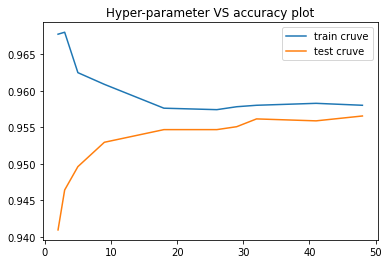

In [10]:
## hyper-parameter vs accuracy plot

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [11]:
params

[2, 3, 5, 9, 18, 26, 29, 32, 41, 48]

In [0]:
## Plotting the decision boundaries

# 7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

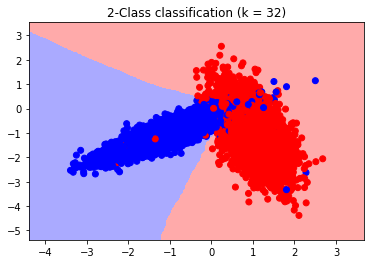

In [13]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 32)                          ## From the plot , I see the low distance between the train and test is at 32
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)